# Annotate files

In [12]:
import os
from glob import glob
from re import match
import csv
"""
fonction: List pairs of file name and its language, and return the list
ex. ---
{'3-2': 'TRK', '1-1': 'JPN', '3-3': 'TRK', '3-1': 'TRK', '1-3': 'JPN', '1-2': 'JPN'}
"""
def listing_files(directory_path):
    listing = {} # dict to put in pairs of file name & its language (CHS/ENG/FRA/JPN/KOR/TRK)
    for file in glob(os.path.join(directory_path, "*.txt")):
        file_id = os.path.basename(file).split(".")[0] # pick up file name
        if match(r"2-*", file_id): # English if name starts with "1-"
            listing[file_id] = "ENG"
        elif match(r"3-*", file_id): # Turkish if name starts with "2-"
            listing[file_id] = "TRK"
        elif match(r"4-*", file_id):
            listing[file_id] = "FRA" # French if name starts with "3-"
    listing = sorted(listing.items())
    return listing

"""
fonction: Create CSV with given data
ex. ---
No  language
3-2 TRK
1-1 JPN
"""
def make_csv(directory_path, listing):
    labels = ["Label", "Language"]
    with open(directory_path+"annotation_corpus.tsv", "w", newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(labels)
        for key, value in listing:
            writer.writerow([key, value])
"""
main fonction
"""

if __name__ == "__main__":
    # path to the corpus directory
    directory_path = "C:\Plurital\EI\projet\src"

    # make a listing of data
    listing = listing_files(directory_path)
    
    # put data into CSV
    make_csv(directory_path, listing)

# Récupérer les données

In [14]:
import pandas as pd
data = pd.read_csv("C:\Plurital\EI\projet\srcannotation_corpus.tsv")
data.head(10)

,Label,Language
0,2-1,ENG
1,2-10,ENG
2,2-11,ENG
3,2-12,ENG
4,2-13,ENG
5,2-14,ENG
6,2-15,ENG
7,2-16,ENG
8,2-17,ENG
9,2-18,ENG


In [15]:
# value_counts() A quick way to see how many different values there are in a column of a table
# Homogène dans toutes les langues
data["Language"].value_counts()


ENG    25
TRK    25
FRA    25
Name: Language, dtype: int64

In [23]:
# Encodage de l'étiquette pour la convertir sous forme numérique
from sklearn.preprocessing import LabelEncoder
X = data["Label"]
y = data["Language"]
conv = LabelEncoder()
y = conv.fit_transform(y)

In [2]:
# une autre méthode pour importer le corpus
# shuffle pour mélanger les documents

import sklearn
import sklearn.datasets
dataset = sklearn.datasets.load_files("C:\Plurital\EI\projet\corpus", encoding="utf-8", shuffle=True)

In [3]:
# obtenir le premier 200 caractères du premier texte

dataset.data[5][:200]


'   #Blog Jobenstock » Flux Blog Jobenstock » Flux des commentaires Blog\n   Jobenstock » 8 métiers de la fonction publique accessibles sans\n\n   logo\n\n8 métiers de la fonction publique accessibles sans '

In [4]:
# The target labels (integer index)

dataset.target

array([2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 0, 0, 2, 2, 2, 1, 1])

In [5]:
# The names of target classes

dataset.target_names

['ENG', 'FRA', 'TRK']

# Texte préprocessing

In [6]:
# nettoyage

clean_texte = []
import re 
for texte in dataset.data:
    texte = re.sub("[_/\+\$\*&#©o+,\.\(\)\[\]\"0-9\n»]", "", texte)
    clean_texte.append(texte)
print(clean_texte[5][:200])

   Blg Jbenstck  Flux Blg Jbenstck  Flux des cmmentaires Blg   Jbenstck   métiers de la fnctin publique accessibles sans   lg métiers de la fnctin publique accessibles sans cncurs ni diplôme !   Rate 


## Vectorisation

In [7]:
import sklearn.feature_extraction.text
import sklearn.model_selection

# test train split
train_set, test_set, train_target, test_target = sklearn.model_selection.train_test_split(clean_texte, dataset.target, test_size=0.33)

vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=2) # pour filtrer les hapax

train_set_counts = vectorizer.fit_transform(train_set)
test_set_counts = vectorizer.transform(test_set)


## Entraîner des classifieurs

In [17]:
# Multinomial Naive Bayes

import sklearn.naive_bayes
classifier = sklearn.naive_bayes.MultinomialNB()
cl = classifier.fit(train_set_counts, train_target)

# Prediction 

In [9]:
# Perform classification on an array of test vectors test_set_counts
test_predicted = classifier.predict(test_set_counts)

In [10]:
predicted_class = dataset.target_names[classifier.predict(test_set_counts[2]).item()]
vrai_class = dataset.target_names[test_target[2].item()]
print(f"Classe réelle: {vrai_class}, classe prédite {predicted_class}")

Classe réelle: TRK, classe prédite TRK


# Métriques de classification

In [11]:
import sklearn.metrics
print(sklearn.metrics.classification_report(test_target, test_predicted, target_names=dataset.target_names))

              precision    recall  f1-score   support

         ENG       0.89      1.00      0.94         8
         FRA       1.00      1.00      1.00        10
         TRK       1.00      0.86      0.92         7

    accuracy                           0.96        25
   macro avg       0.96      0.95      0.95        25
weighted avg       0.96      0.96      0.96        25



## Table confusion

c:\users\hehua\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


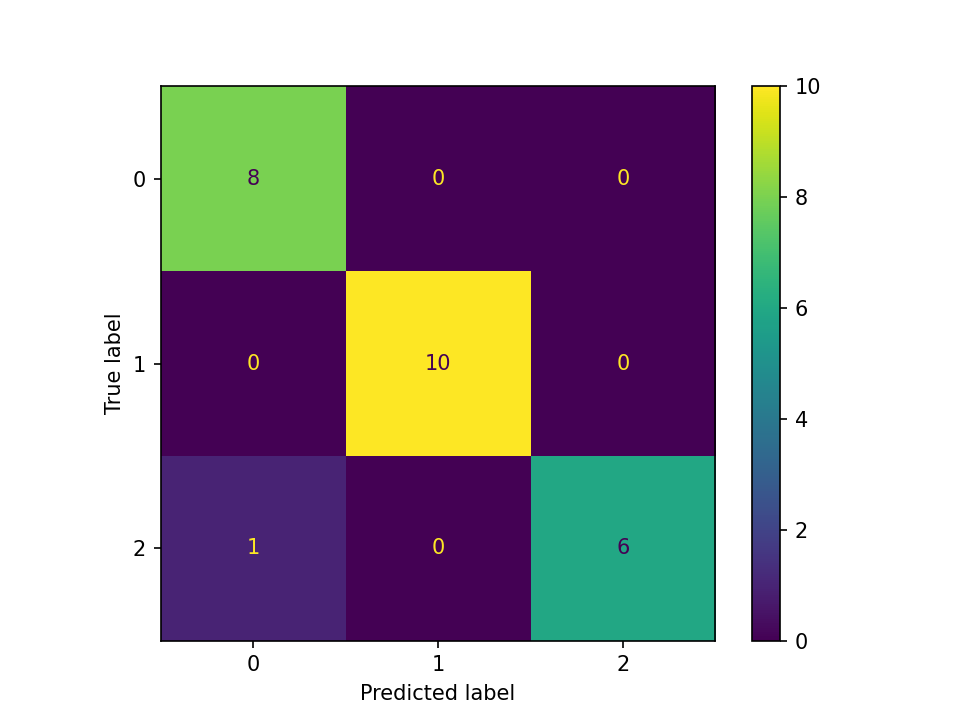

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cl, test_set_counts, test_target)  
plt.show()

## Autres classifieurs

In [13]:
import sklearn.neighbors, sklearn.tree

In [14]:
def train_eval(classifier, train_set, train_target, test_set, test_target, target_names):
    classifier.fit(train_set, train_target)
    test_predicted = classifier.predict(test_set)
    print(sklearn.metrics.classification_report(test_target, test_predicted, target_names=target_names))

In [22]:
for classifier in (
    sklearn.neighbors.KNeighborsClassifier(n_neighbors=3),
    sklearn.naive_bayes.MultinomialNB(),
    sklearn.tree.DecisionTreeClassifier(),
):
    print(type(classifier).__name__)
    train_eval(
        classifier,
        train_set_counts,
        train_target,
        test_set_counts,
        test_target,
        dataset.target_names,
    )

KNeighborsClassifier
              precision    recall  f1-score   support

         ENG       0.89      1.00      0.94         8
         FRA       1.00      0.90      0.95        10
         TRK       0.86      0.86      0.86         7

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

MultinomialNB
              precision    recall  f1-score   support

         ENG       0.89      1.00      0.94         8
         FRA       1.00      1.00      1.00        10
         TRK       1.00      0.86      0.92         7

    accuracy                           0.96        25
   macro avg       0.96      0.95      0.95        25
weighted avg       0.96      0.96      0.96        25

DecisionTreeClassifier
              precision    recall  f1-score   support

         ENG       0.89      1.00      0.94         8
         FRA       1.00      0.80      0.89        10
         TRK     